In [94]:
import pandas as pd 
import scipy.stats as stats
import seaborn as sns
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import os
import glob

sns.set_theme(style="whitegrid")

# Combine single participant's level data

In [103]:
p1 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant1/*.csv')))
p2 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant2/*.csv')))
# p3 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant3/*.csv')))
# p4 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant4/*.csv')))
# p5 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant5/*.csv')))
# p6 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant6/*.csv')))
# p7 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant7/*.csv')))
# p8 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant8/*.csv')))
# p9 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant9/*.csv')))
# p10 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant10/*.csv')))

p1

,Valence,Arousal,Expression
0,0.012626,0.241269,7
1,-0.195107,0.263049,0
2,0.061991,0.201836,1
3,0.114016,0.180770,1
4,0.035768,0.222740,7
...,...,...,...
0,0.500000,0.400000,4
1,0.200000,-0.300000,3
2,-0.100000,-0.100000,7
3,-0.400000,-0.400000,6


# Extract single level data, taken from all participants

In [96]:
filepath = 'Data/'
fileL1 = 'Level1.csv'
fileL2 = 'Level2.csv'
fileL3 = 'Level3.csv'
# fileL4 = 'Level4.csv'
# fileL5 = 'Level5.csv'
# fileL6 = 'Level6.csv'
# fileL7 = 'Level7.csv'
# fileL8 = 'Level8.csv'
# fileL9 = 'Level9.csv'
# fileL10 = 'Level10.csv'
# fileL11 = 'Level11.csv'
# fileL12 = 'Level12.csv'
# fileL13 = 'Level13.csv'
# fileL14 = 'Level14.csv'
# fileL15 = 'Level15.csv'
# fileL16 = 'Level16.csv'
# fileL17 = 'Level17.csv'
# fileL18 = 'lastLeven.csv'

#find folder of each participant
participants = os.listdir('Data/') 
print(participants)

#find a specific level file inside the participant folder
files1 = []
files2 = []
files3 = []
files4 = []
files5 = []
files6 = []
files7 = []
files8 = []
files9 = []
files10 = []
files11 = []
files12 = []
files13 = []
files14 = []
files15 = []
files16 = []
files17 = []
files18 = []
for p in participants:
    files1.append(filepath+p+'/'+fileL1)
    files2.append(filepath+p+'/'+fileL2)
    files3.append(filepath+p+'/'+fileL3)
    # files4.append(filepath+p+'/'+fileL4)
    # files5.append(filepath+p+'/'+fileL5)
    # files6.append(filepath+p+'/'+fileL6)
    # files7.append(filepath+p+'/'+fileL7)
    # files8.append(filepath+p+'/'+fileL8)
    # files9.append(filepath+p+'/'+fileL9)
    # files10.append(filepath+p+'/'+fileL10)
    # files11.append(filepath+p+'/'+fileL11)
    # files12.append(filepath+p+'/'+fileL12)
    # files13.append(filepath+p+'/'+fileL13)
    # files14.append(filepath+p+'/'+fileL14)
    # files15.append(filepath+p+'/'+fileL15)
    # files16.append(filepath+p+'/'+fileL16)
    # files17.append(filepath+p+'/'+fileL17)
    # files18.append(filepath+p+'/'+fileL18)
print(files2)

#combine different participant's same level data
data1 = []
data2 = []
data3 = []
data4 = []
data5 = []
data6 = []
data7 = []
data8 = []
data9 = []
data10 = []
data11 = []
data12 = []
data13 = []
data14 = []
data15 = []
data16 = []
data17 = []
data18 = []

for f in files1:
    data1.append(pd.read_csv(f))

for f in files2:
    data2.append(pd.read_csv(f))

for f in files3:
    data3.append(pd.read_csv(f))

# for f in files4:
#     data4.append(pd.read_csv(f))

# for f in files5:
#     data5.append(pd.read_csv(f))

# for f in files6:
#     data6.append(pd.read_csv(f))

# for f in files7:
#     data7.append(pd.read_csv(f))

# for f in files8:
#     data8.append(pd.read_csv(f))

# for f in files9:
#     data9.append(pd.read_csv(f))

# for f in files10:
#     data10.append(pd.read_csv(f))

# for f in files11:
#     data11.append(pd.read_csv(f))

# for f in files12:
#     data12.append(pd.read_csv(f))

# for f in files13:
#     data13.append(pd.read_csv(f))

# for f in files14:
#     data14.append(pd.read_csv(f))

# for f in files15:
#     data15.append(pd.read_csv(f))

# for f in files16:
#     data16.append(pd.read_csv(f))
    
# for f in files17:
#     data17.append(pd.read_csv(f))

# for f in files18:
#     data18.append(pd.read_csv(f))

level1 = pd.concat((data1), ignore_index=True)
level2 = pd.concat((data2), ignore_index=True)
level3 = pd.concat((data3), ignore_index=True)
# level4 = pd.concat((data4), ignore_index=True)
# level5 = pd.concat((data5), ignore_index=True)
# level6 = pd.concat((data6), ignore_index=True)
# level7 = pd.concat((data7), ignore_index=True)
# level8 = pd.concat((data8), ignore_index=True)
# level9 = pd.concat((data9), ignore_index=True)
# level10 = pd.concat((data10), ignore_index=True)
# level11 = pd.concat((data11), ignore_index=True)
# level12 = pd.concat((data12), ignore_index=True)
# level13 = pd.concat((data13), ignore_index=True)
# level14 = pd.concat((data14), ignore_index=True)
# level15 = pd.concat((data15), ignore_index=True)
# level16 = pd.concat((data16), ignore_index=True)
# level17 = pd.concat((data17), ignore_index=True)
# level18 = pd.concat((data18), ignore_index=True)

['Participant1', 'Participant2']
['Data/Participant1/Level2.csv', 'Data/Participant2/Level2.csv']


In [104]:
levels = os.listdir('Data/Participant1/')

levels

['Level1.csv', 'Level2.csv', 'Level3.csv']

# Functions to add labels to graphs

In [98]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with 2 decimal places
        label = "{:.3f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [99]:
def add_value_labels_int(ax, spacing=5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with 2 decimal places
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [100]:
print(level1.iloc[:, 0])

0       0.012626
1      -0.195107
2       0.061991
3       0.114016
4       0.035768
          ...   
1881   -0.174747
1882   -0.189359
1883   -0.086247
1884   -0.172216
1885   -0.058159
Name: Valence, Length: 1886, dtype: float64


# Plot Arousal + Valence means for each level

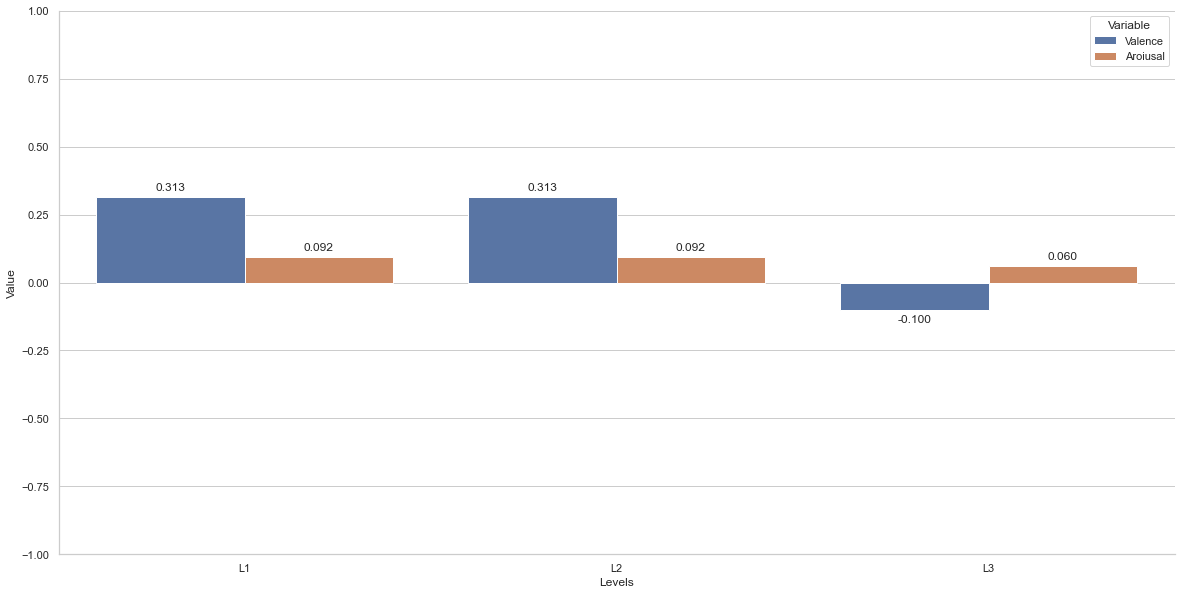

In [101]:
avplot = pd.DataFrame([
        ["L1", level1.iloc[:, 0].mean(), level1.iloc[:, 1].mean()],
        ["L2", level2.iloc[:, 0].mean(), level2.iloc[:, 1].mean()],
        ["L3", level3.iloc[:, 0].mean(), level3.iloc[:, 1].mean()],
        # ["L4", level4.iloc[:, 0].mean(), level4.iloc[:, 1].mean()],
        # ["L5", level5.iloc[:, 0].mean(), level5.iloc[:, 1].mean()],
        # ["L6", level6.iloc[:, 0].mean(), level6.iloc[:, 1].mean()],
        # ["L7", level7.iloc[:, 0].mean(), level7.iloc[:, 1].mean()],
        # ["L8", level8.iloc[:, 0].mean(), level8.iloc[:, 1].mean()],
        # ["L9", level9.iloc[:, 0].mean(), level9.iloc[:, 1].mean()],
        # ["L10", level10.iloc[:, 0].mean(), level10.iloc[:, 1].mean()],
        # ["L11", level11.iloc[:, 0].mean(), level11.iloc[:, 1].mean()],
        # ["L12", level12.iloc[:, 0].mean(), level12.iloc[:, 1].mean()],
        # ["L13", level13.iloc[:, 0].mean(), level13.iloc[:, 1].mean()],
        # ["L14", level14.iloc[:, 0].mean(), level14.iloc[:, 1].mean()],
        # ["L15", level15.iloc[:, 0].mean(), level15.iloc[:, 1].mean()],
        # ["L16", level16.iloc[:, 0].mean(), level16.iloc[:, 1].mean()],
        # ["L17", level17.iloc[:, 0].mean(), level17.iloc[:, 1].mean()],
        # ["L18", level18.iloc[:, 0].mean(), level18.iloc[:, 1].mean()],
         ],  
        columns = ["Levels", "Valence", "Aroiusal"])

fig, ax1 = plt.subplots(figsize=(20, 10))
tidy = avplot.melt(id_vars='Levels').rename(columns=str.title)
sns.barplot(x='Levels', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)
ax1.yaxis.grid(True)
ax1.set_axisbelow(True)
plt.ylim(bottom = -1,top = 1)
add_value_labels(ax1)

In [102]:
#Arousal + Valence
av = df1.iloc[:, 0:2] 

#av["AV"] = av[["arousal","valence"]].apply(tuple, axis=1)
                
av1 = av[["arousal","valence"]].apply(tuple, axis=1)



av2 = av[["arousal","valence"]].apply(tuple, axis=1)

av3 = pd.DataFrame(av1)

av4 = pd.DataFrame(av2)
    
av3["av2"] = av4

av5.reset_index(inplace=True, drop=True)
av3

#tuples = list(av.itertuples(index=False, name=None))
#print(tuples)
#tuples

#av1 = av.iloc[:, 2] 
#print(av1)

#av2 = df1.iloc[:, 0:2] 
#av2["AV"] = av2[["arousal","valence"]].apply(tuple, axis=1)    

KeyError: "None of [Index(['arousal', 'valence'], dtype='object')] are in the [columns]"

# Combine all valence and arousal values for a single participant

In [ ]:
av1 = p1.iloc[:, 0:2]
av2 = p2.iloc[:, 0:2]
# av3 = p3.iloc[:, 0:2]
# av4 = p4.iloc[:, 0:2]
# av5 = p5.iloc[:, 0:2]
# av6 = p6.iloc[:, 0:2]
# av7 = p7.iloc[:, 0:2]
# av8 = p8.iloc[:, 0:2]
# av9 = p9.iloc[:, 0:2]
# av9 = p10.iloc[:, 0:2]

[(-1.0, 1.0)]

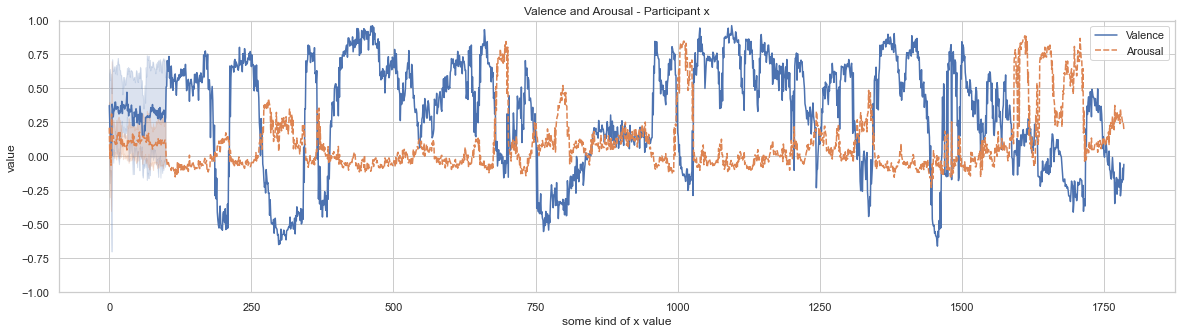

In [105]:
fig, ax = plt.subplots(figsize=(20, 5))

ax = sns.lineplot(data=av1)
ax.set(xlabel='some kind of x value', ylabel='value', title='Valence and Arousal - Participant x')
ax.set(ylim=(-1, 1))

In [ ]:
avMean = (df.iloc[:, 0:2]).mean()

avMeanTable = pd.DataFrame([avMean], columns=['Arousal', 'Valence'])
avMeanTable

,Arousal,Valence
0,0.092318,0.312806


[(-1.0, 1.0)]

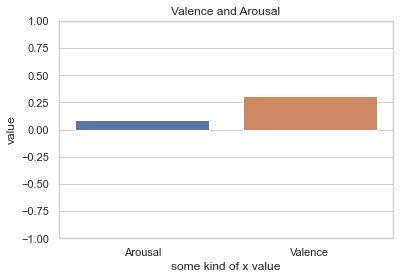

In [ ]:
ax = sns.barplot(data=avMeanTable)
ax.set(xlabel='some kind of x value', ylabel='value', title='Valence and Arousal')
ax.set(ylim=(-1, 1))

# Expression Data

In [113]:
#Expression only, extracting data from each participant

# combinedexpr = pd.concat([p1.iloc[:, 0:3], p2.iloc[:, 0:3], p3.iloc[:, 0:3], p4.iloc[:, 0:3], p5.iloc[:, 0:3], 
#                        p6.iloc[:, 0:3], p7.iloc[:, 0:3], p8.iloc[:, 0:3], p9.iloc[:, 0:3], p10.iloc[:, 0:3]], 
#                        axis=0, ignore_index=True)

combinedExpr = pd.concat([p1.iloc[:, 0:3], p2.iloc[:, 0:3]], axis=0, ignore_index=True)

#Remap the integers into words
mapping = {0: 'Neutral', 1: 'Happy', 2: 'Sad', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Anger', 7: 'Contempt'}
expressionCategories = ['Neutral', 'Happy', 'Sad', 'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt']

#Take just the expression column for mapping, as it can't be performed on full datasets
expressionLabeled = combinedExpr.iloc[:,2].map(mapping)

expressionLabeled

0       Contempt
1        Neutral
2          Happy
3          Happy
4       Contempt
          ...   
3777        Fear
3778    Surprise
3779    Contempt
3780       Anger
3781     Neutral
Name: Expression, Length: 3782, dtype: object

In [107]:
#Count occurrence/frequency of each expression
expressionFreq = expressionLabeled.value_counts().to_dict()

#Create a dataframe out of it
expressionFreqdf = pd.DataFrame(expressionFreq.items())
print (expressionFreqdf)

          0     1
0     Happy  2480
1   Neutral   434
2      Fear   222
3       Sad   188
4  Contempt   172
5   Disgust   172
6  Surprise   102
7     Anger    12


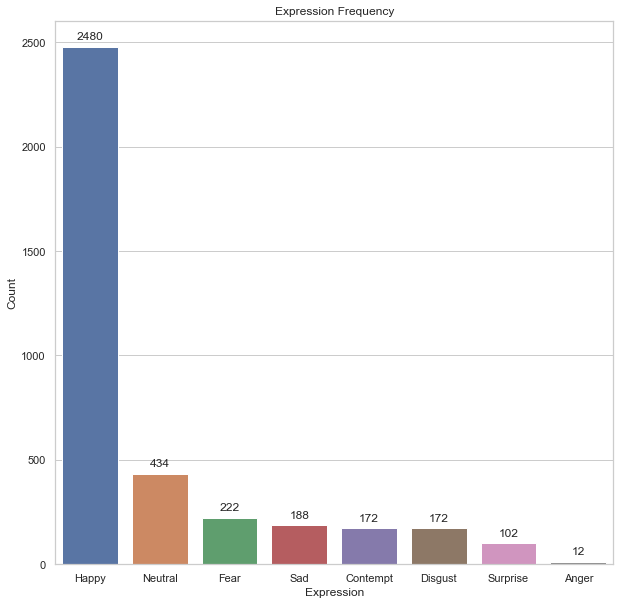

In [110]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.barplot(x=0, y=1,data=expressionFreqdf,)
ax.set(xlabel='Expression', ylabel='Count', title='Expression Frequency')
#ax.set(ylim=(-1, 1))
add_value_labels_int(ax)

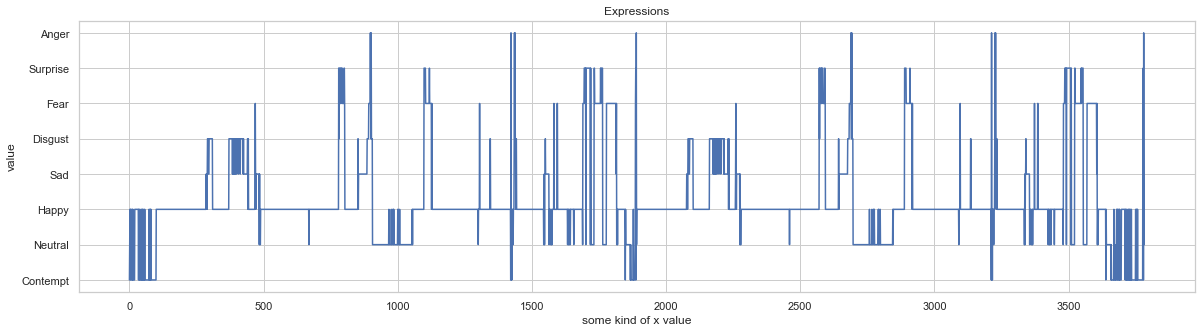

In [111]:
fig, ax = plt.subplots(figsize=(20, 5))

ax = sns.lineplot(data=expressionLabeled)

ax.set(xlabel='some kind of x value', ylabel='value', title='Expressions')
plt.yticks(expressionCategories)
plt.gca().invert_yaxis()
#ax.set(ylim=())